<a href="https://colab.research.google.com/github/Nandish30115/Netflix_EDA_Data_Analytics/blob/main/Project_Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: appload a file from device

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving netflix.csv to netflix.csv
User uploaded file "netflix.csv" with length 3399671 bytes


***Firstly we have uploaded the Data set to the colab notebook.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('netflix.csv')
raw_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In the first glance it can be noted that the columns  Director, Cast, Country, Listed_in are comma separated values(Nested Ormat) and need to be converted into an unnested format.

In [ ]:
split_data = raw_data
split_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## ***In order to Unnest the data, we have to take each comma seperated series of the data frame, Split it and explode it into rows For the final Data set.***

In [ ]:
split_data['director'] = split_data['director'].str.split(',')  # Split into lists
split_data = split_data.explode('director').reset_index(drop=True)  # Explode into rows
split_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
8,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [ ]:
split_data['cast'] = split_data['cast'].str.split(',')  # Split into lists
split_data = split_data.explode('cast').reset_index(drop=True)  # Explode into rows
split_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
split_data['country'] = split_data['country'].str.split(',')  # Split into lists
split_data = split_data.explode('country').reset_index(drop=True)  # Explode into rows
split_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
split_data['listed_in'] = split_data['listed_in'].str.split(',')  # Split into lists
split_data = split_data.explode('listed_in').reset_index(drop=True)  # Explode into rows
split_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
unnested_data=split_data.copy()
unnested_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


### ***Now we need to convert the date_added column to a Datetime type. To do that we must First get rid of the unwanted spaces Present in the items of the series.***

In [ ]:
unnested_data['date_added']=unnested_data['date_added'].str.strip()

In [ ]:
unnested_data['date_added']=pd.to_datetime(unnested_data['date_added'],format='%B %d, %Y')
unnested_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
date_added_data=unnested_data.copy()
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


### *Now we need to format the duration column. The duration column shows the number of seasons for a TV show and the duration for a film. So we can neglect the string part So that it helps us in allowing to analyse the data more easily and precisely.*



In [ ]:
date_added_data['duration']=date_added_data['duration'].str.split(' ')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,"[90, min]",Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,"[2, Seasons]",International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,"[2, Seasons]",TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,"[2, Seasons]",TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,"[2, Seasons]",International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,"[111, min]",International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,"[111, min]",Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,"[111, min]",Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,"[111, min]",International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
date_added_data['duration']=date_added_data['duration'].str.get(0)
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


## ***Now we need to Identify the columns with NaN or Null values and replace it with the appropriate imputation methods for the data Provided***

In [ ]:
columns_with_nan = date_added_data.columns[date_added_data.isna().any()].tolist() #Gives the columns with NaN or null
columns_with_nan

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

# ***The Number of Null/NaN values in each column of the dataframe are as follows:***

In [ ]:
date_added_data['director'].isna().sum()

50643

In [ ]:
date_added_data['cast'].isna().sum()

2149

In [ ]:
date_added_data['country'].isna().sum()

11897

In [ ]:
date_added_data['date_added'].isna().sum()

158

In [ ]:
date_added_data['rating'].isna().sum()

67

In [ ]:
date_added_data['duration'].isna().sum()

3

## ***Firstly, let us look into the directors Value That need imputation***

In [ ]:
director_mode=date_added_data.groupby(["cast"])["director"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
director_mode.rename('director_mode', inplace=True)
director_mode

,director_mode
cast,
Jr.,Sam Macaroni
"""Riley"" Lakdhar Dridi",Rebecca Zlotowski
'Najite Dede,Aniedi Anwah
2 Chainz,NaN
2Mex,Ava DuVernay
...,...
İbrahim Büyükak,Bedran Güzel
İbrahim Çelikkol,NaN
Şahin Irmak,Hakan Algül


In [ ]:
director_mode.isna().sum()

10608

Even after finding the combinantion of the Most possible number of Directors that are used to working more with a certain actor. There are still Null values.

Which MeansMore imputation methods are to be used.

In [ ]:
date_added_data=date_added_data.merge(director_mode, on='cast', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez Singh
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez Singh
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh


In [ ]:
date_added_data['director']=date_added_data['director'].fillna(date_added_data['director_mode'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez Singh
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez Singh
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh


In [ ]:
date_added_data['director'].isna().sum()

35080

## ***So, Even After filling the data with the help of director_mode which was an imputation method found By understanding which "Director-actor" Pairing is more likely to work together.***

***By this method we were able to decrease the number of null/NaN values to 35080.***

## ***Now let us try by "Director-genre" Pairing. As in most cases a director is more inclined to take a movie/TV Show in a genre that they like or are a master in.***

In [ ]:
director_mode_genre=date_added_data.groupby(["listed_in"])["director"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
director_mode_genre.rename('director_mode_genre', inplace=True)
director_mode_genre

,director_mode_genre
listed_in,
Anime Features,Toshiya Shinohara
Children & Family Movies,Steven Spielberg
Classic & Cult TV,Michael Cumming
Classic Movies,Steven Spielberg
Comedies,Raja Gosnell
...,...
TV Dramas,Mike Flanagan
TV Horror,Eli Roth
TV Sci-Fi & Fantasy,Jesse V. Johnson


In [ ]:
date_added_data=date_added_data.merge(director_mode_genre, on='listed_in', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode,director_mode_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,Jehane Noujaim
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,Rob Seidenglanz
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Akiva Schaffer
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Tom Hooper
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine


In [ ]:
date_added_data['director']=date_added_data['director'].fillna(date_added_data['director_mode_genre'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode,director_mode_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,Jehane Noujaim
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,Rob Seidenglanz
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Akiva Schaffer
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Tom Hooper
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine


In [ ]:
date_added_data['director'].isna().sum()

41

## ***So there are still 41 more NaN/null Values to be filled.Let us now pair up "director-country" to try and impute rest of the values.***

In [ ]:
director_mode_country=date_added_data.groupby(["country"])["director"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
director_mode_country.rename('director_mode_country', inplace=True)

,director_mode_country
country,
,Janusz Majewski
Afghanistan,Pieter-Jan De Pue
Albania,Antonio Morabito
Algeria,Youssef Chahine
Angola,Maradona Dias Dos Santos
...,...
Uruguay,Federico Veiroj
Venezuela,Jorge Granier
Vietnam,Victor Vu


In [ ]:
date_added_data=date_added_data.merge(director_mode_country, on='country', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode,director_mode_genre,director_mode_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,Jehane Noujaim,Thomas Astruc
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul,Alan Poul
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul,Alan Poul
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,Rob Seidenglanz,Alan Poul
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul,Alan Poul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine,David Dhawan
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Akiva Schaffer,David Dhawan
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Tom Hooper,David Dhawan
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine,David Dhawan


In [ ]:
date_added_data['director']=date_added_data['director'].fillna(date_added_data['director_mode_country'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode,director_mode_genre,director_mode_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,Jehane Noujaim,Thomas Astruc
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul,Alan Poul
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul,Alan Poul
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,Rob Seidenglanz,Alan Poul
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,Alan Poul,Alan Poul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine,David Dhawan
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Akiva Schaffer,David Dhawan
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Tom Hooper,David Dhawan
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Youssef Chahine,David Dhawan


In [ ]:
date_added_data['director'].isna().sum()

0

# **Now Let's drop a few unnecessary columns from the dataframe**

In [ ]:
date_added_data=date_added_data.drop(['director_mode','director_mode_genre','director_mode_country'],axis=1)
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


# ***so, As seen in the above cell, null-countis now zero. Hence We have succeeded in imputing the directors data.***

# ***Now let us apply suitable imputation methods on the Cast column as well.***

### ***For that Initially, Let us pair the director-cast values. Since we have been able to impute the director values successfully. We might be able to fill all the NaN values in the cast column in one go.***

In [ ]:
cast_mode=date_added_data.groupby(["director"])["cast"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
cast_mode.rename('cast_mode', inplace=True)
cast_mode

,cast_mode
director,
Aaron Moorhead,Tate Ellington
Aaron Woolf,NaN
Abbas Alibhai Burmawalla,Akshaye Khanna
Abdullah Al Noor,Allen Shubhro
Abhinav Shiv Tiwari,Huma Qureshi
...,...
Çagan Irmak,Bilge Sen
Ísold Uggadóttir,Babetida Sadjo
Óskar Thór Axelsson,Elma Stefania Agustsdottir


In [ ]:
cast_mode.isna().sum()

476

### We can see that there are a few null values in the actor mode as well. Let us see what the results are after the imputation.

In [ ]:
date_added_data=date_added_data.merge(cast_mode, on='director', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Mädchen Amick
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [ ]:
date_added_data['cast']=date_added_data['cast'].fillna(date_added_data['cast_mode'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Mädchen Amick
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [ ]:
date_added_data['cast'].isna().sum()

1239

### **So, there are still 1239 values to be filled in the Cast column of the data.**

Now Let us try and impute the data by pairing The actor with their respective countries.

**We are considering the countries Initially as there is more chance for an actor to try different genres than breaking through an industry in a new country.**

In [ ]:
cast_mode_country=date_added_data.groupby(["country"])["cast"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
cast_mode_country.rename('cast_mode_country', inplace=True)
cast_mode_country

,cast_mode_country
country,
,Areen Omari
Afghanistan,Sohrab Nazari
Albania,Claudio Santamaria
Algeria,Abdalla Mahmoud
Angola,Cigano Satyohamba
...,...
Uruguay,Mirella Pascual
Venezuela,Paco Ignacio Taibo II
Vietnam,Mai Cat Vi


In [ ]:
date_added_data=date_added_data.merge(cast_mode_country, on='country', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_mode,cast_mode_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,David Attenborough
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Mädchen Amick,Deon Lotz
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher


In [ ]:
date_added_data['cast']=date_added_data['cast'].fillna(date_added_data['cast_mode_country'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_mode,cast_mode_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,David Attenborough
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Mädchen Amick,Deon Lotz
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher


In [ ]:
date_added_data['cast'].isna().sum()

134

### ***So, there are still 134 NaN values in the Cast column. This implies that we must apply the next round of imputations with the help of "Cast-Listed_in" pairing.***

In [ ]:
cast_mode_genre=date_added_data.groupby(["listed_in"])["cast"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
cast_mode_genre.rename('cast_mode_genre', inplace=True)
cast_mode_genre

,cast_mode_genre
listed_in,
Anime Features,James Faulkner
Children & Family Movies,Koichi Yamadera
Classic & Cult TV,Arnold Ridley
Classic Movies,James Robertson Justice
Comedies,Carlos Alazraqui
...,...
TV Dramas,Christopher Lee
TV Horror,Catherine Lemieux
TV Sci-Fi & Fantasy,Alex Mallari Jr.


In [ ]:
date_added_data=date_added_data.merge(cast_mode_genre, on='listed_in', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_mode,cast_mode_country,cast_mode_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,David Attenborough,David Attenborough
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz,Tay Ping Hui
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz,Joanna Kulig
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Mädchen Amick,Deon Lotz,Mädchen Amick
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz,Tay Ping Hui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,Anupam Kher
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,David Attenborough
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,Gael García Bernal
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,Anupam Kher


In [ ]:
date_added_data['cast']=date_added_data['cast'].fillna(date_added_data['cast_mode_genre'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_mode,cast_mode_country,cast_mode_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",NaN,David Attenborough,David Attenborough
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz,Tay Ping Hui
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz,Joanna Kulig
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Mädchen Amick,Deon Lotz,Mädchen Amick
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Tay Ping Hui,Deon Lotz,Tay Ping Hui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,Anupam Kher
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,David Attenborough
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,Gael García Bernal
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Anupam Kher,Anupam Kher


In [ ]:
date_added_data['cast'].isna().sum()

0

# ***So, We have successfully imputed the cast column of the dataset.***

# **Now let us remove the unwanted columns from the dataset.**

In [ ]:
date_added_data=date_added_data.drop(['cast_mode','cast_mode_country','cast_mode_genre'],axis=1)
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


# ***Now Let us impute the country data***

In [ ]:
date_added_data['country'].isna().sum()

11897

***It can be observed that there are 11897 NaN or Null values in the dataset. In order to impute the values we can primarily consider the following***



*   Directors
*   Actor





In [ ]:
country_mode_directors=date_added_data.groupby(["director"])["country"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
country_mode_directors.rename('country_mode_directors', inplace=True)
country_mode_directors

,country_mode_directors
director,
Aaron Moorhead,United States
Aaron Woolf,Venezuela
Abbas Alibhai Burmawalla,India
Abdullah Al Noor,Bangladesh
Abhinav Shiv Tiwari,India
...,...
Çagan Irmak,Turkey
Ísold Uggadóttir,Belgium
Óskar Thór Axelsson,Iceland


In [ ]:
date_added_data=date_added_data.merge(country_mode_directors, on='director', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_mode_directors
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",South Korea
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",United States
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,India
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,India
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India


In [ ]:
date_added_data['country']=date_added_data['country'].fillna(date_added_data['country_mode_directors'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_mode_directors
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",South Korea
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",United States
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,India
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,India
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India


In [ ]:
date_added_data['country'].isna().sum()

2910

## There are still 2910 values to be imputed. So, lets use the Actors column.

In [ ]:
country_mode_actors=date_added_data.groupby(["cast"])["country"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
country_mode_actors.rename('country_mode_actors', inplace=True)
country_mode_actors

,country_mode_actors
cast,
Jr.,United States
"""Riley"" Lakdhar Dridi",France
'Najite Dede,Nigeria
2 Chainz,United States
2Mex,United States
...,...
İbrahim Büyükak,Turkey
İbrahim Çelikkol,Turkey
Şahin Irmak,Turkey


In [ ]:
date_added_data=date_added_data.merge(country_mode_actors, on='cast', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_mode_directors,country_mode_actors
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States,United States
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",United States,South Africa
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,India,India
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,India,India
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India


In [ ]:
date_added_data['country']=date_added_data['country'].fillna(date_added_data['country_mode_actors'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_mode_directors,country_mode_actors
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States,United States
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",United States,South Africa
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,India,India
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,India,India
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India


In [ ]:
date_added_data['country'].isna().sum()

1625

### ***It can be observed that there are still 1625 values to be filled. What would be the next suitable values to take as referance to imputhe the remaining NaN or null values?***

***The Next column that is the most adhering after Director and Cast is the genre of the movie/TV Show***

In [ ]:
country_mode_genre=date_added_data.groupby(["listed_in"])["country"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np)
country_mode_genre.rename('country_mode_genre', inplace=True)
country_mode_genre

,country_mode_genre
listed_in,
Anime Features,Japan
Children & Family Movies,United States
Classic & Cult TV,United Kingdom
Classic Movies,United States
Comedies,United States
...,...
TV Dramas,United States
TV Horror,United States
TV Sci-Fi & Fantasy,Canada


In [ ]:
date_added_data=date_added_data.merge(country_mode_genre, on='listed_in', how='left')
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_mode_directors,country_mode_actors,country_mode_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States,United States,United States
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa,South Korea
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa,United States
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",United States,South Africa,United States
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India,India
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,India,India,United States
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,India,India,United States
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India,India


In [ ]:
date_added_data['country']=date_added_data['country'].fillna(date_added_data['country_mode_genre'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_mode_directors,country_mode_actors,country_mode_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States,United States,United States
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa,South Korea
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa,United States
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",United States,South Africa,United States
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Korea,South Africa,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India,India
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...,India,India,United States
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,India,India,United States
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,India,India,India


In [ ]:
date_added_data['country'].isna().sum()

0

## Finally we have eliminated all the NaN values in the dataset. Hence we now we drop the unwanted columns from the dataset and move on to the next columns.

In [ ]:
date_added_data.drop(['country_mode_directors','country_mode_actors','country_mode_genre'],axis=1,inplace=True)
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


## *The next few columns that require imputation are 'date_added', 'rating' and 'duration'. It can be noted that these columns contain 158, 67 and 3 NaN or null values respectively. All these together constitutes Less than 1% of the number of rows in the dataset and hence can be neglected.*

In [ ]:
date_added_data=date_added_data.dropna(subset=['date_added','rating','duration'])
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
date_added_data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### **Finally we have imputed all the data in the dataset. Now Let Us move on to see If there are any duplicates in the dataset.**

In [ ]:
date_added_data.duplicated().sum()

7

## So, There are only 7 duplicated values. Let us delete the duplicates in order to avaoid it's influence in our analysis

In [ ]:
date_added_data=date_added_data.drop_duplicates()
date_added_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
date_added_data.duplicated().sum()

0

# ***We have successfully deleted all the duplicate values.***

**`Now we need to Normalize the data`**

In [ ]:
clean_data=date_added_data.copy()
clean_data['country'] = clean_data['country'].str.strip().str.lower()
clean_data['listed_in'] = clean_data['listed_in'].str.strip().str.lower()

# **`We have Now fully cleaned the data. Now let us now move to the analysis part.`**

In [ ]:
clean_data.describe()

,date_added,release_year
count,201830,201830.000000
mean,2019-06-19 20:00:41.238666240,2013.451618
min,2008-01-01 00:00:00,1925.000000
25%,2018-06-26 00:00:00,2012.000000
50%,2019-09-04 00:00:00,2016.000000
75%,2020-09-10 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,9.016766


## On the first glance draw The following observations:

*   *It is clear that the range of the **release year** varies from **1925** to **2021**.*
*   *The **Date** on which the The movie/TV Show was **uploaded** to netflix ranges **2008** to **2021**.*

In [ ]:
clean_data.nunique()

,0
show_id,8790
type,2
title,8790
director,5118
cast,39248
country,123
date_added,1713
release_year,74
rating,14
duration,210


# **Now Let us conduct some basic analysis on the data.**

In [ ]:
categorical_columns = ['type', 'country', 'rating', 'listed_in']  # Categorical columns

# Bar plots for categorical columns

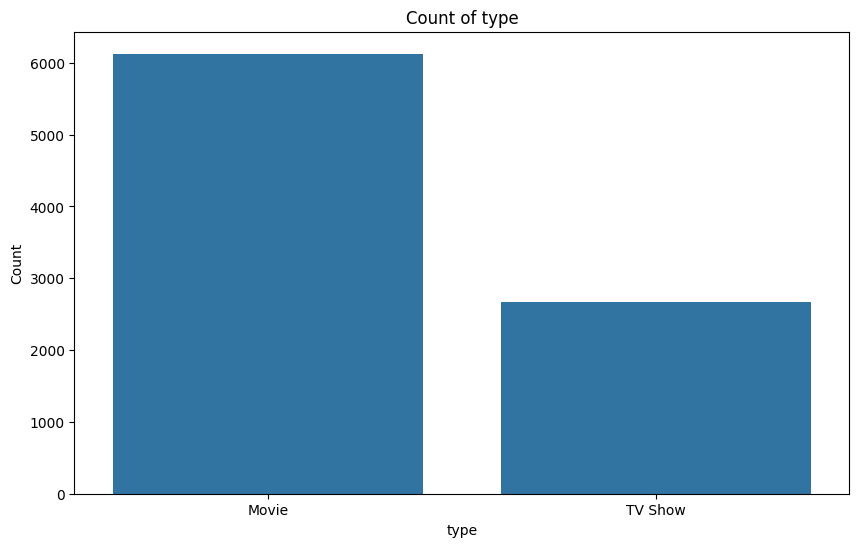

In [ ]:
plt.figure(figsize=(10, 6))
type_count=clean_data.groupby('type')['title'].nunique().sort_values(ascending=False)
sns.barplot(x=type_count.index, y=type_count.values)
plt.title(f"Count of type")
plt.xlabel("type")
plt.ylabel("Count")
plt.show()

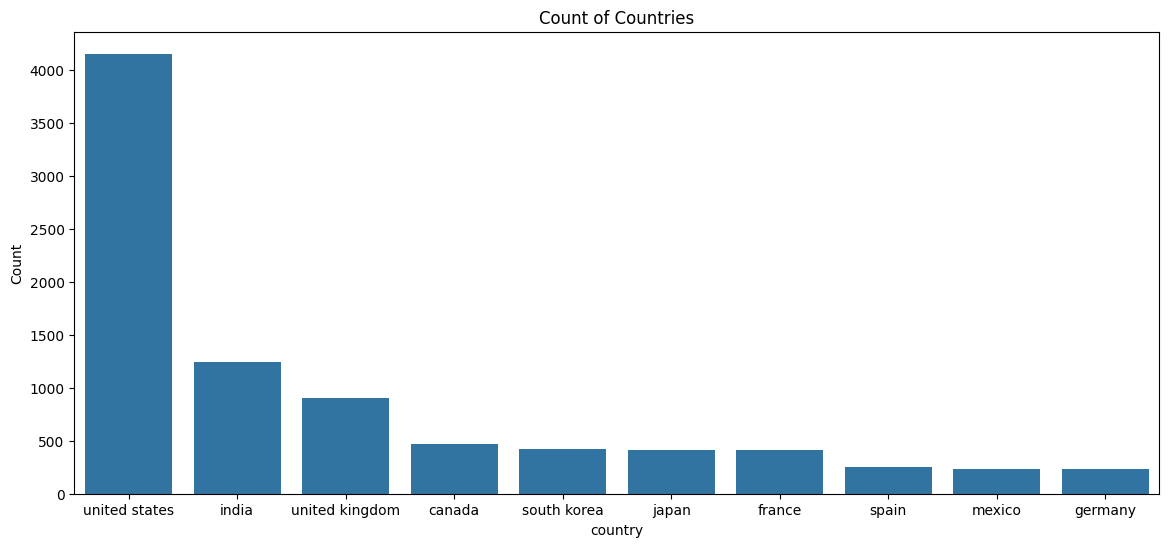

In [ ]:
plt.figure(figsize=(14, 6))
country_count=clean_data.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=country_count.index, y=country_count.values)
plt.title(f"Count of Countries")
plt.xlabel("country")
plt.ylabel("Count")
plt.show()

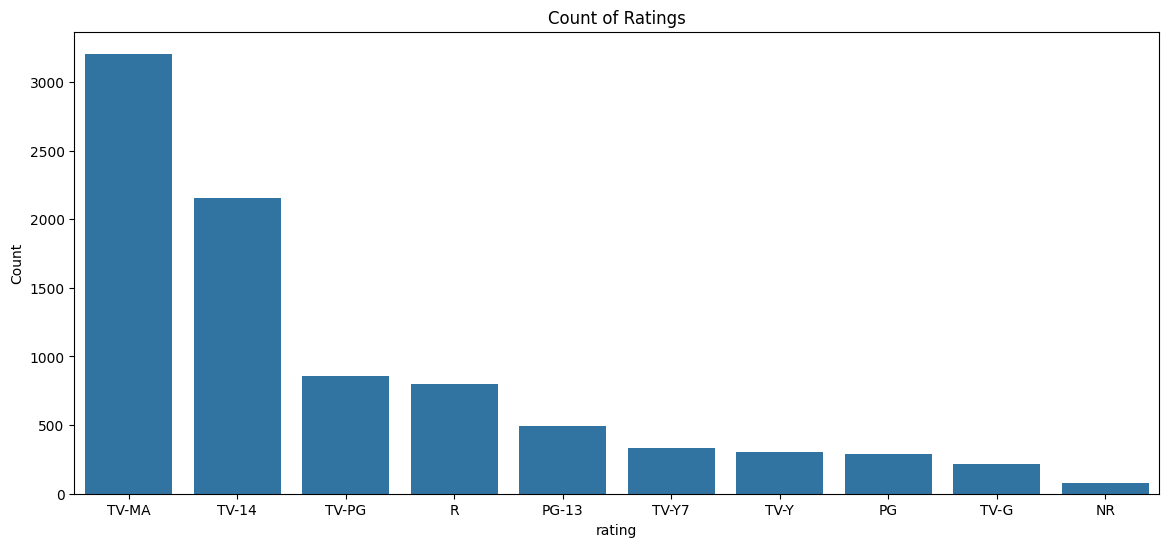

In [ ]:
plt.figure(figsize=(14, 6))
rating_count=clean_data.groupby('rating')['title'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title(f"Count of Ratings")
plt.xlabel("rating")
plt.ylabel("Count")
plt.show()

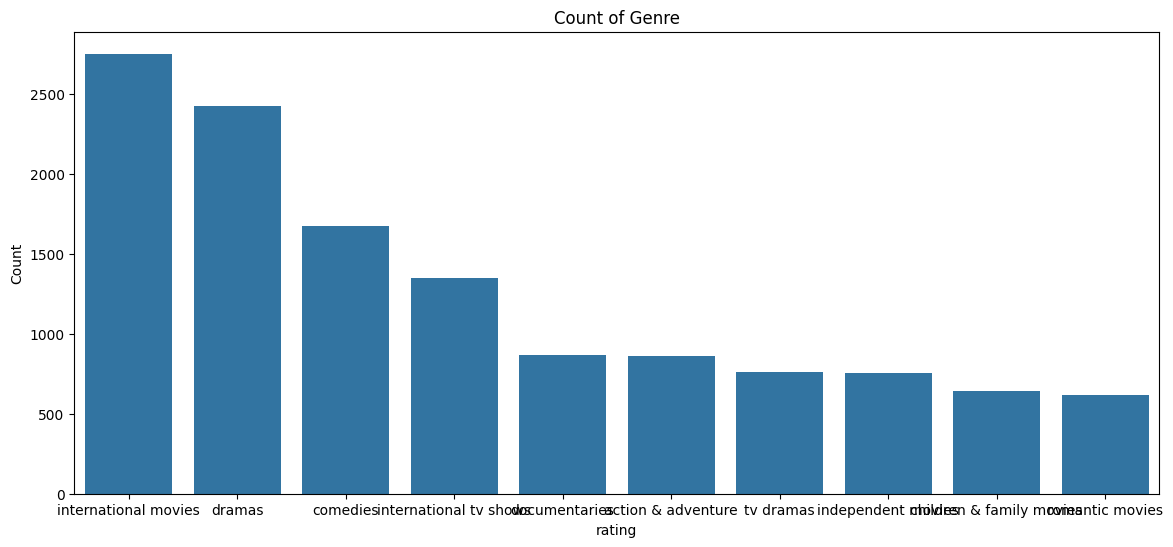

In [ ]:
plt.figure(figsize=(14, 6))
genre_count=clean_data.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title(f"Count of Genre")
plt.xlabel("rating")
plt.ylabel("Count")
plt.show()

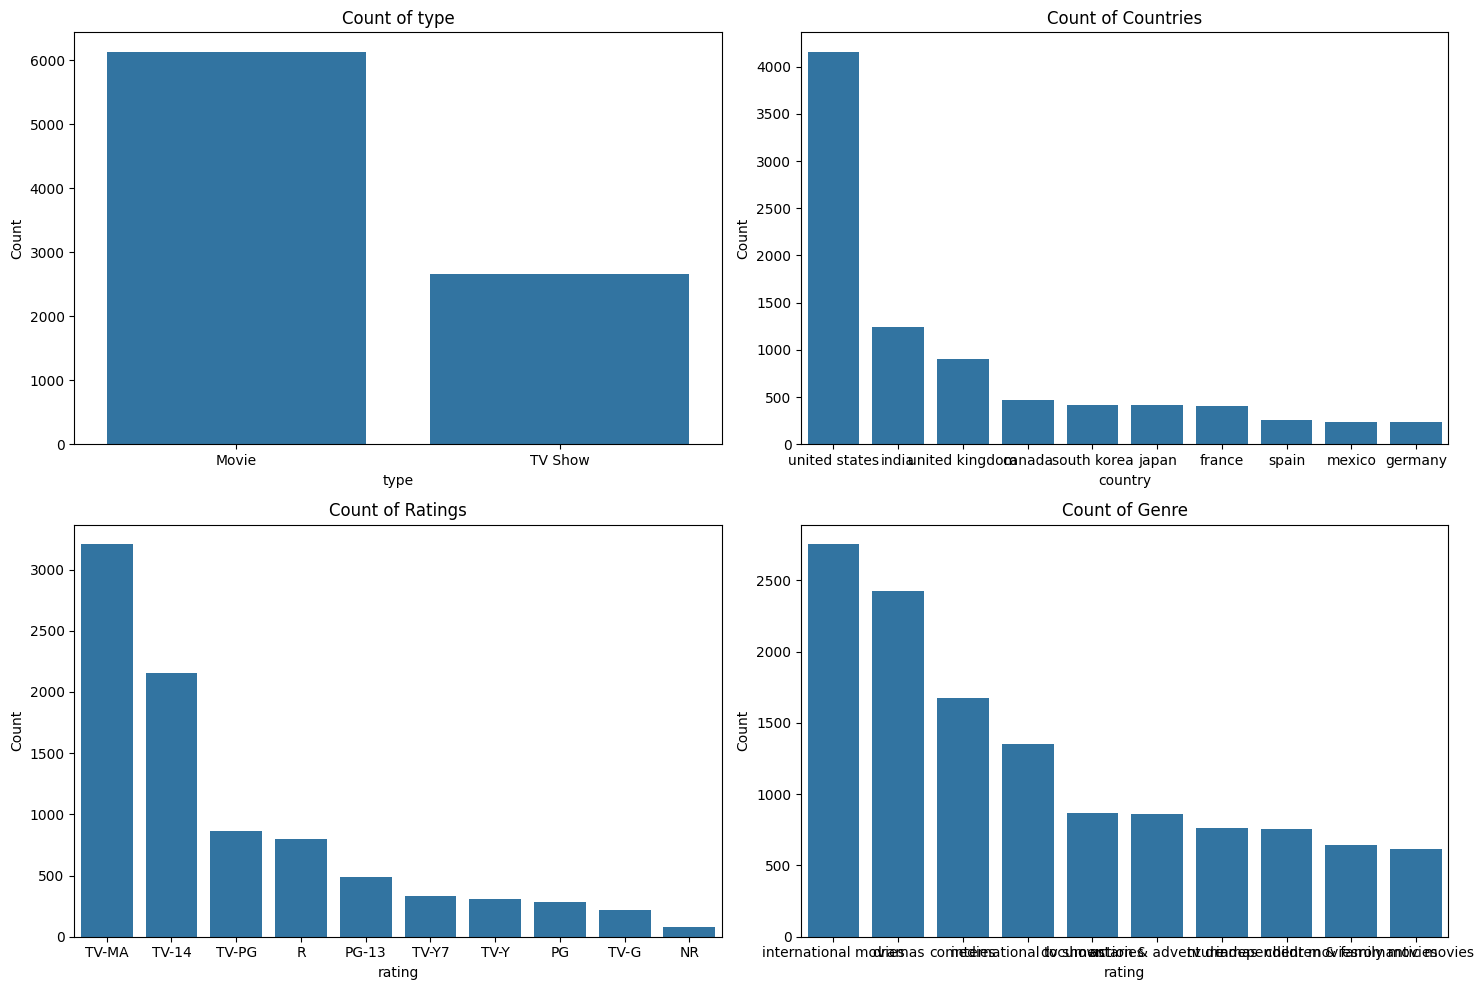

In [ ]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=type_count.index, y=type_count.values)
plt.title(f"Count of type")
plt.xlabel("type")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
sns.barplot(x=country_count.index, y=country_count.values)
plt.title(f"Count of Countries")
plt.xlabel("country")
plt.ylabel("Count")

plt.subplot(2, 2, 3)
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title(f"Count of Ratings")
plt.xlabel("rating")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title(f"Count of Genre")
plt.xlabel("rating")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

The above texts gives us a basic Idea on the data distribution over various columns of the datasets like

1.   There are more movies than TV Shows in the Platform
2.   movies and TV shows from the United states and India are the most in number.

1.   TV-MA rated content are the most in number
2.   International movies are also large in numbers





In [ ]:
type_count=clean_data.groupby('type')['title'].nunique()
type_count

,title
type,
Movie,6126
TV Show,2664


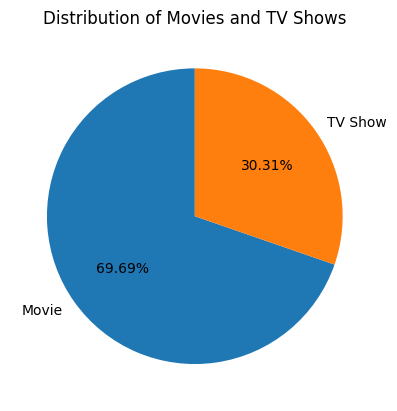

In [ ]:
plt.pie(type_count,
       labels=type_count.index,
       startangle=90,
       autopct = '%.2f%%')
plt.title('Distribution of Movies and TV Shows')
plt.show()

### **So there are More Movies added to netflix compared to the the number of TV Shows.**

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']
TV_Show_year_distribution=no_of_TV_shows.groupby('release_year')['title'].nunique().reset_index()
movie_year_distribution=no_of_movies.groupby('release_year')['title'].nunique().reset_index()

In [ ]:
TV_Show_year_distribution.head()

,release_year,title
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1


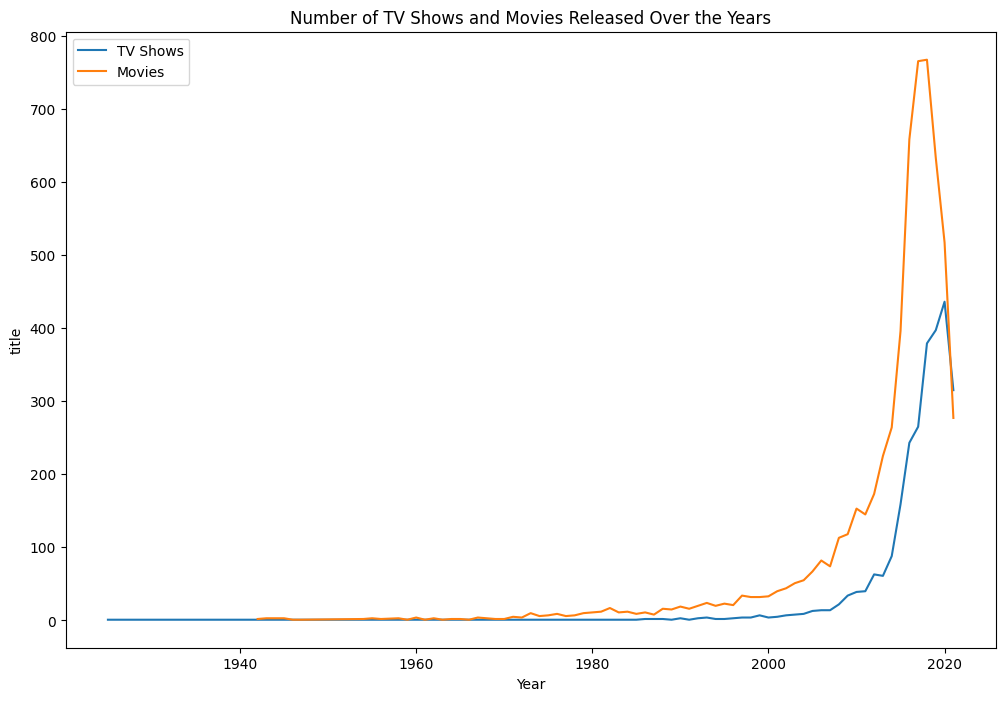

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = TV_Show_year_distribution, x = 'release_year', y = 'title',label = 'TV Shows')
sns.lineplot(data = movie_year_distribution, x = 'release_year', y = 'title',label = 'Movies')
plt.title('Number of TV Shows and Movies Released Over the Years')
plt.xlabel('Year')
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
release_yr_data=clean_data.groupby(['release_year','type'])['title'].nunique().reset_index()
sns.boxplot(data=release_yr_data, x='type', y='release_year')
plt.title("Release Year Distribution by Type from 2000 to 2021")
plt.show()

NameError: name 'plt' is not defined



*   Ever since the 2000s There has been an exponential increase in the number of TV Shows and Movies Released. But then we see a sudden decline in the number of TV Shows and movies released.
*   The number of movies released is seen to be more than the number of TV Shows released in Majority of the years.



# ***So, Let us Limit the range and look more into the the data between 2000 and 2021***

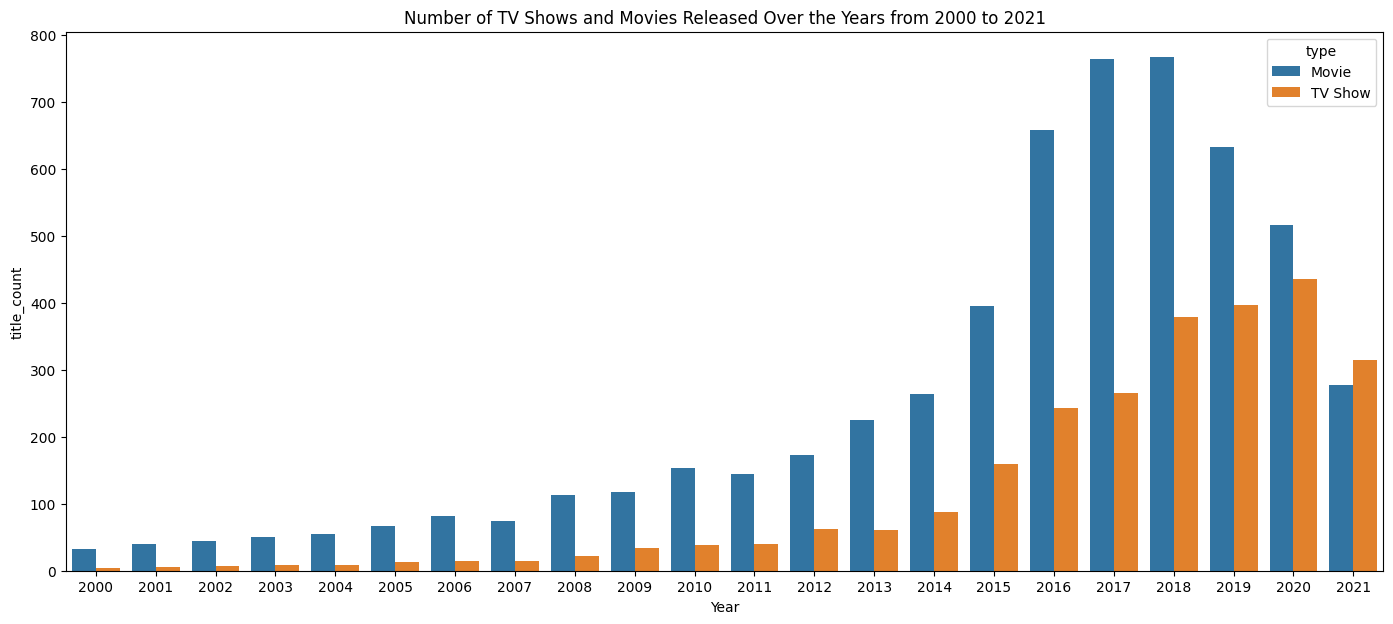

In [ ]:
lim_data=clean_data[(clean_data['release_year']>=2000) & (clean_data['release_year']<=2021)]
plt.figure(figsize=(17, 7))
new_lim_data=lim_data.groupby(['release_year','type'])['title'].nunique().reset_index(name='title_count')
sns.barplot(data=new_lim_data, x='release_year', y='title_count', hue='type')
plt.title('Number of TV Shows and Movies Released Over the Years from 2000 to 2021')
plt.xlabel('Year')
plt.show()

It can be observed that the number of TV Shows is more than the number of movies In Netflix that were released in the years of 2021. This may be due to many reasons.



1.   The increase in the number of users watching episode wise long form content due to the extra time available during the pandemic.
2.   The decrease in the number of Movies released due to the pandemic.

3.   Increase in the competition in the OTT platforms for the few movies released in the pandemic due to the popuarity of OTT.




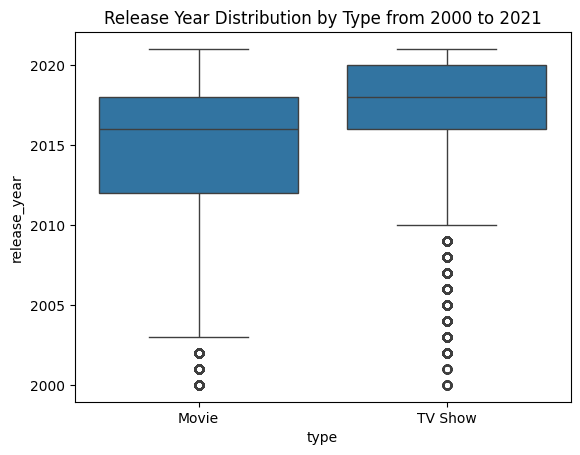

In [ ]:
sns.boxplot(data=lim_data, x='type', y='release_year')
plt.title("Release Year Distribution by Type from 2000 to 2021")
plt.show()

It can also be observed that there is already a decrease in the Number of movies in Netflix released in the year 2019.

This might be due to the Major expansion that it's competitors like amazon Prime video had gone through in the year 2019. **The competitor invested in original content, spending around $7.8 billion on programming in 2019**. This included a diverse slate of new shows and movies aimed at attracting a wider audience.

in conclusion, ***The increased revenue generation and consumer engagement put the competitor in a better place to bid for  the OTT rights of the best movies released since then***. This inturn has effected Netflix ever since.

# Now let us look More into the "date_added" trends. This might help  us in understanding of our hunch on the reason for the decrease in the number of content stands or not.

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']
TV_Show_date_distribution=no_of_TV_shows.groupby(no_of_TV_shows['date_added'].dt.year)['title'].nunique().reset_index(name='title_count')
movie_date_distribution=no_of_movies.groupby(no_of_movies['date_added'].dt.year)['title'].nunique().reset_index(name='title_count')

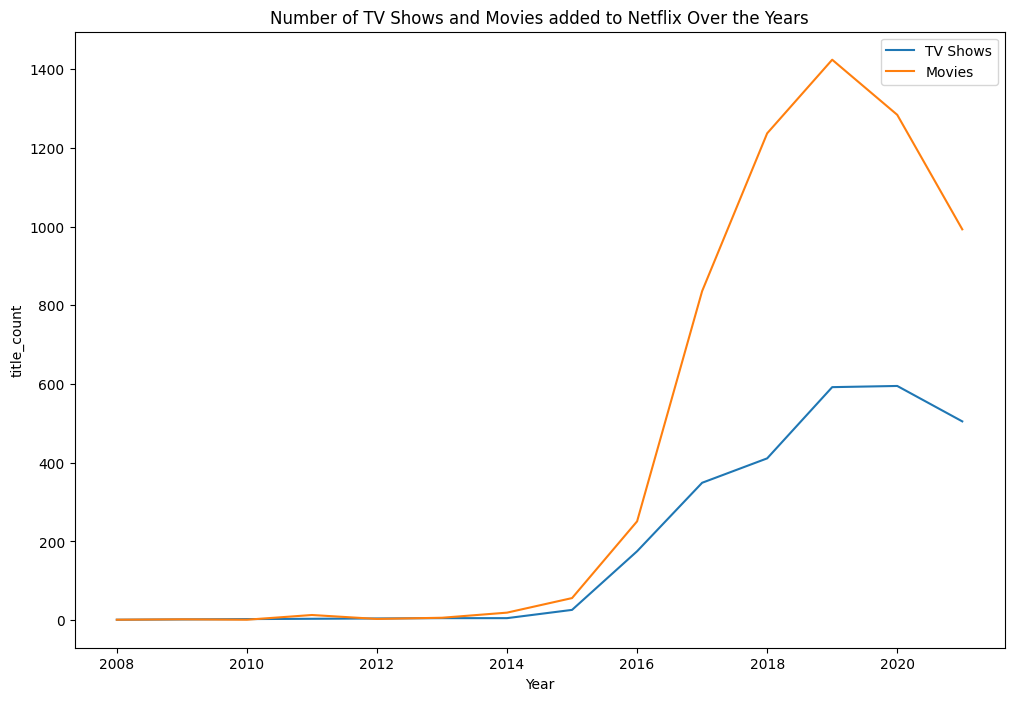

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = TV_Show_date_distribution, x ='date_added', y = 'title_count',label = 'TV Shows')
sns.lineplot(data = movie_date_distribution, x ='date_added', y = 'title_count',label = 'Movies')
plt.title('Number of TV Shows and Movies added to Netflix Over the Years')
plt.xlabel('Year')
plt.show()

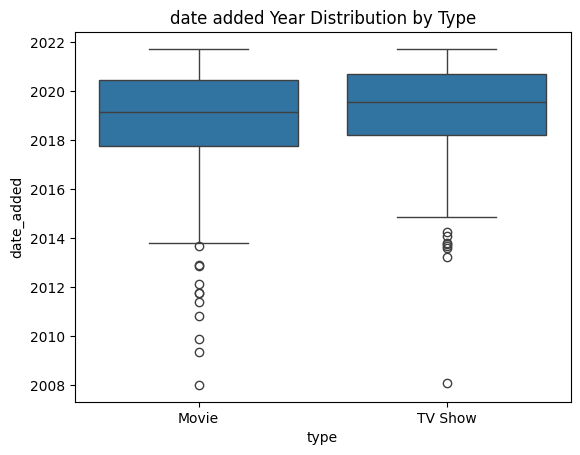

In [ ]:
type_data=clean_data.groupby(['type','date_added'])['title'].nunique().reset_index(name='title_count')
sns.boxplot(data=type_data, x='type', y='date_added')
plt.title("date added Year Distribution by Type")
plt.show()

**`It can be observed that the most Number of movie aqquisitions took place between the year of 2016 and 2019, where there was a steep rise in the  number of movies aqquired.`**

**`It can also be observed that there was a steady rising pattern in the number of TV Shows aqquired as well.`**

***But after 2018 we see a decline in the Number of movies and TV Shows aqquired. There might be several reasins for this change in pattern.***


### 1.   Less availability of quality content.
### 2.   The increasing competition from competitors for the aqquisition of Content. which resulted in a sudden dip in both the movies and TV Shows.
### 3.   The decrease in the number of movies due to the pandemic.





## **From the data set provided It can be concluded that the company might have invested heavily in acquiring large number of movies and TV Shows inorder to maintain it's dominance, but the decrease in the number of acquisitions might suggest that the decision has backfired.**

# ***Now Let us look into which type of content is more famous in different countries.***

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']
country_tv_shows=no_of_TV_shows.groupby('country')['title'].nunique().reset_index(name='title_count')
country_movies=no_of_movies.groupby('country')['title'].nunique().reset_index(name='title_count')

In [ ]:
country_tv_shows.sort_values(by='title_count',ascending=False,inplace=True)
country_tv_shows.head(10)

,country,title_count
64,united states,1164
53,south korea,357
63,united kingdom,343
31,japan,275
8,canada,144
39,mexico,111
26,india,102
19,france,98
58,taiwan,79
54,spain,69


In [ ]:
country_movies.sort_values(by='title_count',ascending=False,inplace=True)
country_movies.head(10)

,country,title_count
111,united states,2992
42,india,1141
110,united kingdom,564
19,canada,329
33,france,311
35,germany,185
98,spain,183
50,japan,139
74,nigeria,129
30,egypt,127


## From Both Tables it can be observed that the Movies and TV Shows from the United states are the most in demand.

## It can also be seen that there is good demand for K-dramas from south korea and Indian movies have a huge fanbase.

## The famous TV Show the squid game was releasedin the 2021 whoose rights were acquired by the platform. The show was a massive Hit and was a sensation all accross the Globe.

## It can also be observed that the platform in general might have a lot of Indian users. India is  one of  the most populous country in the world and it is more inclined to movies than TV Shows produced in the country.

In [ ]:
#Analysing the top 10-20 countries
plt.figure(figsize=(12, 6))
countries=['united states','india','united kingdom','france','canada','japan','spain','germany','nigeria','china','taiwan','mexico','south korea']
popular_genre=clean_data[clean_data['country'].isin(countries)].groupby(['country','listed_in'])['title'].nunique().reset_index(name='title_count')
popular_genre.columns = ['Country', 'Genre', 'Count']  # Renaming columns
popular_genre_pivot = popular_genre.pivot(index='Country', columns='Genre', values='Count').fillna(0) # Pivoting data to make a 2D matrix

<Figure size 1200x600 with 0 Axes>

In [ ]:
popular_genre

,Country,Genre,Count
0,canada,action & adventure,45
1,canada,anime series,4
2,canada,british tv shows,3
3,canada,children & family movies,84
4,canada,classic & cult tv,4
...,...,...,...
424,united states,tv horror,38
425,united states,tv mysteries,55
426,united states,tv sci-fi & fantasy,63
427,united states,tv shows,6


In [ ]:
popular_genre_pivot

Genre,action & adventure,anime features,anime series,british tv shows,children & family movies,classic & cult tv,classic movies,comedies,crime tv shows,cult movies,...,teen tv shows,thrillers,tv action & adventure,tv comedies,tv dramas,tv horror,tv mysteries,tv sci-fi & fantasy,tv shows,tv thrillers
Country,,,,,,,,,,,,,,,,,,,,,
canada,45.0,0.0,4.0,3.0,84.0,4.0,0.0,97.0,16.0,6.0,...,2.0,50.0,13.0,35.0,36.0,8.0,9.0,11.0,0.0,5.0
china,63.0,2.0,3.0,3.0,16.0,0.0,0.0,31.0,5.0,1.0,...,5.0,6.0,8.0,13.0,20.0,0.0,1.0,4.0,0.0,0.0
france,40.0,0.0,1.0,2.0,23.0,0.0,6.0,52.0,26.0,2.0,...,0.0,45.0,7.0,24.0,31.0,3.0,2.0,1.0,0.0,3.0
germany,35.0,0.0,0.0,6.0,17.0,0.0,0.0,42.0,16.0,4.0,...,0.0,29.0,2.0,5.0,21.0,0.0,2.0,1.0,0.0,0.0
india,148.0,0.0,0.0,3.0,81.0,0.0,11.0,347.0,9.0,5.0,...,1.0,97.0,6.0,28.0,32.0,7.0,3.0,3.0,6.0,3.0
japan,71.0,67.0,163.0,1.0,23.0,0.0,4.0,9.0,17.0,1.0,...,14.0,5.0,6.0,10.0,23.0,5.0,5.0,0.0,2.0,8.0
mexico,9.0,0.0,0.0,0.0,6.0,2.0,1.0,27.0,65.0,0.0,...,0.0,2.0,7.0,6.0,13.0,0.0,0.0,1.0,0.0,0.0
nigeria,4.0,0.0,0.0,0.0,1.0,0.0,0.0,52.0,1.0,0.0,...,0.0,20.0,0.0,2.0,8.0,1.0,0.0,1.0,0.0,0.0
south korea,17.0,0.0,0.0,0.0,10.0,0.0,0.0,17.0,26.0,1.0,...,0.0,15.0,9.0,23.0,129.0,3.0,3.0,0.0,0.0,3.0


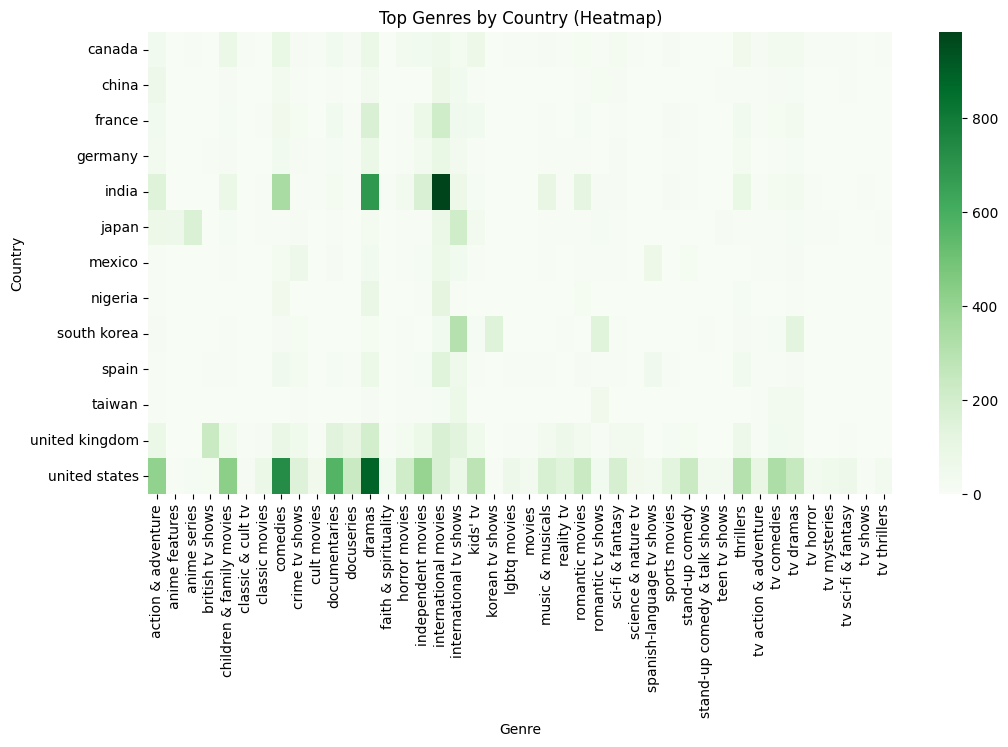

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(popular_genre_pivot, cmap="Greens")
plt.title("Top Genres by Country (Heatmap)")
plt.xlabel("Genre")
plt.ylabel("Country")
plt.show()

## ***Creating a heat map on the genres in different countries alllows the company to understand on where to invest depending on the country.***

## *There will be different and unique popularity in genre depending on the country/region.The heatmap above allows us to understand the Taste of audiences of different parts of the world and their favourite genre*

The heat map shows more concentration of the acquisition of Movies from the US and India.

*   This might be mainly due to the fact that the platform has more users from that Origin.
*   English is an international language that has a wider audience.

This heatmap also shows that there are more oppurtunities to expand in diffferent countries. especially like the likes of china which has a huge population.



# ***Now Let us explore more into the cast and Director details.***

In [ ]:
top10_Directors=clean_data.groupby('director')['title'].nunique().sort_values(ascending=False).head(10).index
top10_Directors

Index([' Alan Poul', ' Hiroyuki Seshita', 'Thomas Astruc', 'Alejandro Lozano',
       'Ishi Rudell', 'Hsu Fu-chun', 'Noam Murro', 'Alastair Fothergill',
       'Juliana Vicente', 'Rob Seidenglanz'],
      dtype='object', name='director')

# **The above is the list of directors whose movies/TV Shows the platform has the most. This might be due to several reasons:**



### *   The Audience really enjoy the content by that particular director
### *   The platform might have a deal with the director. He might be given a certain cut from the profit for persuading the producers to sell the content to the platform.



In [ ]:
top10_actors=clean_data.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10).index
top10_actors

Index(['David Attenborough', ' Grace Passô', ' Junichi Suwabe', ' Anupam Kher',
       ' Vincent Tong', ' Raúl Méndez', ' Jim Broadbent', ' Sue Perkins',
       ' Rory Kinnear', ' Andrea Libman'],
      dtype='object', name='cast')

## ***The above is the list of actors whose movies/TV Shows the platform has the most. The reasons fro this might be the same as mentioned above.***

## *Investigating about the Genre of the top Directors and actors might give us a Vague Idea on why They are so much preffered.*

In [ ]:
top_directors_data = clean_data[clean_data['director'].isin(top10_Directors)]


genre_counts = (
    top_directors_data.groupby(['director', 'listed_in'])['title'].nunique()
    .reset_index(name='count')
)


most_used_genres = (
    genre_counts.loc[genre_counts.groupby('director')['count'].idxmax()]
)

most_used_genres.sort_values(by='count',ascending=False)

,director,listed_in,count
1,Alan Poul,international tv shows,704
11,Hiroyuki Seshita,international tv shows,497
43,Ishi Rudell,tv comedies,389
76,Thomas Astruc,kids' tv,346
23,Alejandro Lozano,crime tv shows,332
33,Hsu Fu-chun,romantic tv shows,312
49,Noam Murro,british tv shows,207
45,Juliana Vicente,docuseries,178
19,Alastair Fothergill,docuseries,136
71,Rob Seidenglanz,tv mysteries,85




*    By identifying the genres most frequently associated with top directors and actors, you can infer the types of content that resonate most with the audience.
*   This inturn helps the platform to prioritize acquiring or producing more content in these popular genres to attract and retain viewers.


---



*   The genre preferences of top directors and actors can vary significantly by region (e.g., Bollywood directors may lean towards musicals, while Korean directors may focus on thrillers or romance).
*   This inturn helps the platform to Increase platform subscriptions and viewer engagement in specific markets by aligning content offerings with regional tastes.


---



*   The genres associated with the platform's top talent can help establish a brand identity.
*   This helps to Strengthen the brand loyalty and attract genre-specific audiences.







In [ ]:
top_actors_data = clean_data[clean_data['cast'].isin(top10_actors)]

genre_counts_act = (
    top_actors_data.groupby(['cast', 'listed_in'])['title'].nunique()
    .reset_index(name='count')
)


most_used_genres = (
    genre_counts_act.loc[genre_counts_act.groupby('cast')['count'].idxmax()]
)

most_used_genres.sort_values(by='count',ascending=False)

,cast,listed_in,count
92,David Attenborough,documentaries,234
23,Grace Passô,docuseries,103
53,Junichi Suwabe,international tv shows,79
13,Anupam Kher,international movies,70
80,Sue Perkins,reality tv,49
57,Raúl Méndez,crime tv shows,48
65,Rory Kinnear,british tv shows,45
84,Vincent Tong,reality tv,42
35,Jim Broadbent,documentaries,39
4,Andrea Libman,tv comedies,24




*   Genres that frequently involve top-tier talent may have longer-lasting appeal or higher re-watch value.
*   Reduce churn by offering timeless content alongside new releases.


---



*    Popular actors often bring their fan base, regardless of genre. Understanding the genres they most frequently work in can help predict which new releases are likely to draw a loyal audience.
*   Helps to drive higher viewership for premium releases, particularly during key times.





# **Let us also look into the most famous actor Director combinations.**

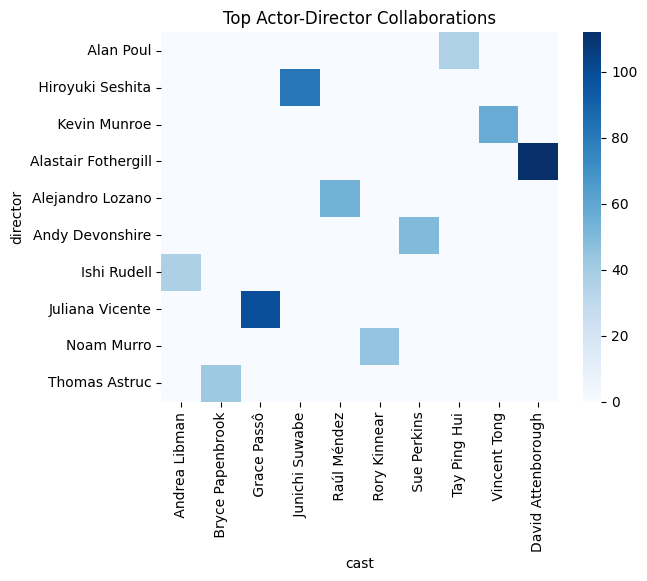

In [ ]:
collaborations = clean_data.groupby(['director', 'cast'])['title'].nunique().reset_index(name='count')

top_collaborations = collaborations.nlargest(10, 'count')

pivot_collaborations = top_collaborations.pivot(index='director', columns='cast', values='count').fillna(0)

sns.heatmap(pivot_collaborations, cmap='Blues', annot=False)
plt.title('Top Actor-Director Collaborations')
plt.show()

# ***The Pair of Alastair Fothergill and David Attenborough is the most Popular in the platform.***

# **Now let us look into The days and Months of the year when Most movies were added. This will help us understand the peak times of an year.**

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']
TV_Show_month_distribution=no_of_TV_shows.groupby([no_of_TV_shows['date_added'].dt.month_name(),'type'])['title'].nunique().reset_index(name='title_count')
movie_month_distribution=no_of_movies.groupby([no_of_movies['date_added'].dt.month_name(),'type'])['title'].nunique().reset_index(name='title_count')

In [ ]:
movie_month_distribution.loc[movie_month_distribution['title_count'] == movie_month_distribution['title_count'].max()]

,date_added,type,title_count
5,July,Movie,565


## So the Most number of movies are released in the month of july.  

# **This mainly might be due to the fact that, July is seen as summer vacation in quite a few countries, espescially in the United States. So a lot of movies will be in Cue to relese, Mostly targetting family audiences.**

## *Let us look into the top 5 in this list.*

In [ ]:
movie_month_distribution.sort_values(by='title_count',ascending=False,inplace=True)
movie_month_distribution.head(5)

,date_added,type,title_count
5,July,Movie,565
0,April,Movie,549
2,December,Movie,547
4,January,Movie,545
10,October,Movie,545


## *April is also seen as a Summer vacation month in many countries. December marks the month of christmas, which is celebrated in the whole world. This explains whys the list is as such.*

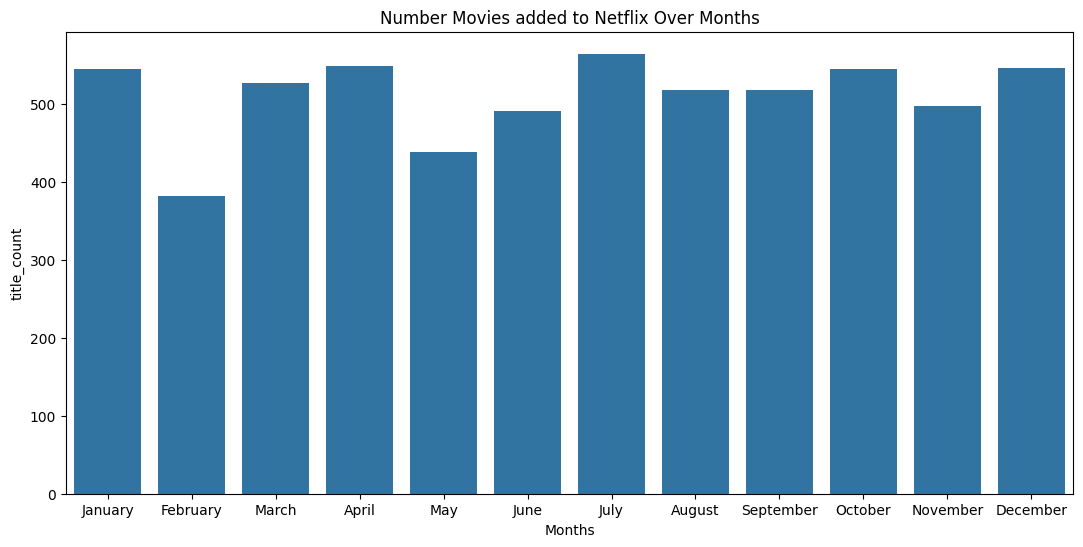

In [ ]:
plt.figure(figsize=(13, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data = movie_month_distribution, x ='date_added', y = 'title_count',order=month_order)
plt.title('Number Movies added to Netflix Over Months')
plt.xlabel('Months')
plt.show()

In [ ]:
TV_Show_month_distribution.loc[TV_Show_month_distribution['title_count'] == TV_Show_month_distribution['title_count'].max()]

,date_added,type,title_count
2,December,TV Show,265


### ***In case of TV shows, Most of them are released in the month of december.  December coincides with major holidays like Christmas, New Year, and winter vacations in many countries. People spend more time at home, increasing their likelihood of binge-watching TV shows.***

# `Let us look into the top 5 in this list.`

In [ ]:
TV_Show_month_distribution.sort_values(by='title_count',ascending=False,inplace=True)
TV_Show_month_distribution.head(5)

,date_added,type,title_count
2,December,TV Show,265
5,July,TV Show,262
11,September,TV Show,251
1,August,TV Show,236
6,June,TV Show,236




*   The Summer vacations on July explains the reasin for it being second in the list.
*   September on the other hand has long been the start of the fall TV season for traditional networks in the U.S. and other regions. Networks typically premiere new shows or new seasons of existing ones to align with the school and work calendar.

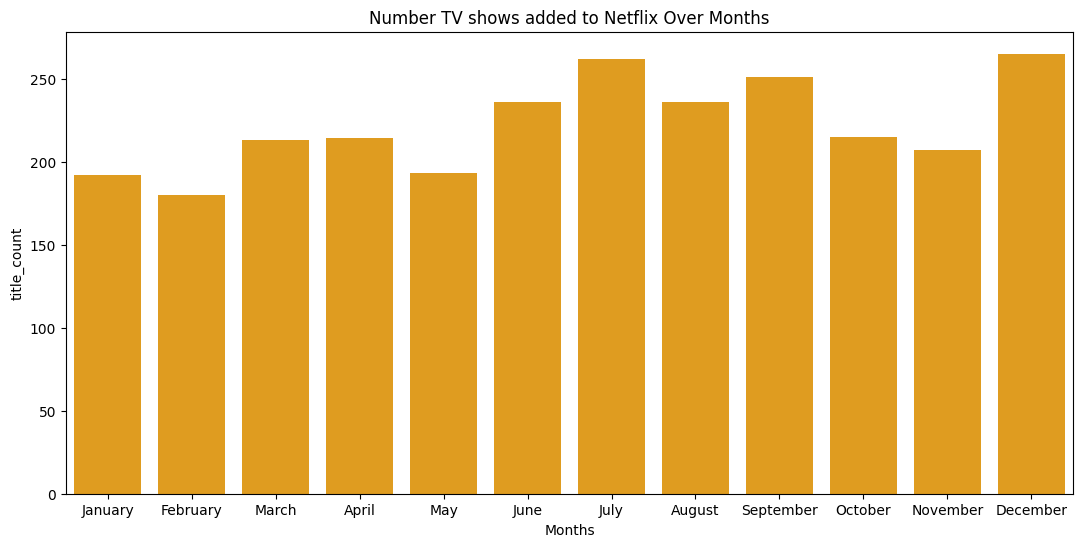

In [ ]:
plt.figure(figsize=(13, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data = TV_Show_month_distribution, x ='date_added', y = 'title_count',order=month_order,color='orange')
plt.title('Number TV shows added to Netflix Over Months')
plt.xlabel('Months')
plt.show()

# Now let us look into The days of the year when Most movies and TV Shows were added. This will help us understand the peak times of an year.

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']
TV_Show_day_distribution=no_of_TV_shows.groupby([no_of_TV_shows['date_added'].dt.day_name(),'type'])['title'].nunique().reset_index(name='title_count')
movie_day_distribution=no_of_movies.groupby([no_of_movies['date_added'].dt.day_name(),'type'])['title'].nunique().reset_index(name='title_count')

In [ ]:
movie_day_distribution.loc[movie_day_distribution['title_count'] == movie_day_distribution['title_count'].max()]

,date_added,type,title_count
0,Friday,Movie,1565


### *Unsurprisingly, The Most movies were added to the platform on friday. Friday being the last working day of the week is a perfect time to release a movie to attract audiences from families, collegues, friends etc...*

In [ ]:
movie_day_distribution.sort_values(by='title_count',ascending=False,inplace=True)
movie_day_distribution.head(5)

,date_added,type,title_count
0,Friday,Movie,1565
4,Thursday,Movie,1052
6,Wednesday,Movie,905
5,Tuesday,Movie,851
1,Monday,Movie,627


### Friday being the last working day of the week is a perfect time to release a movie and hence shows clear domination.

### Thursday releases make strategic sense, especially when considering countries with significant Muslim populations. In these regions, Fridays and Saturdays are typically observed as days off, aligning with cultural and religious practices. Releasing content on Thursdays allows platforms to capture the attention of the Muslim audience as they transition into their weekend, providing an ideal window for higher viewership and engagement.

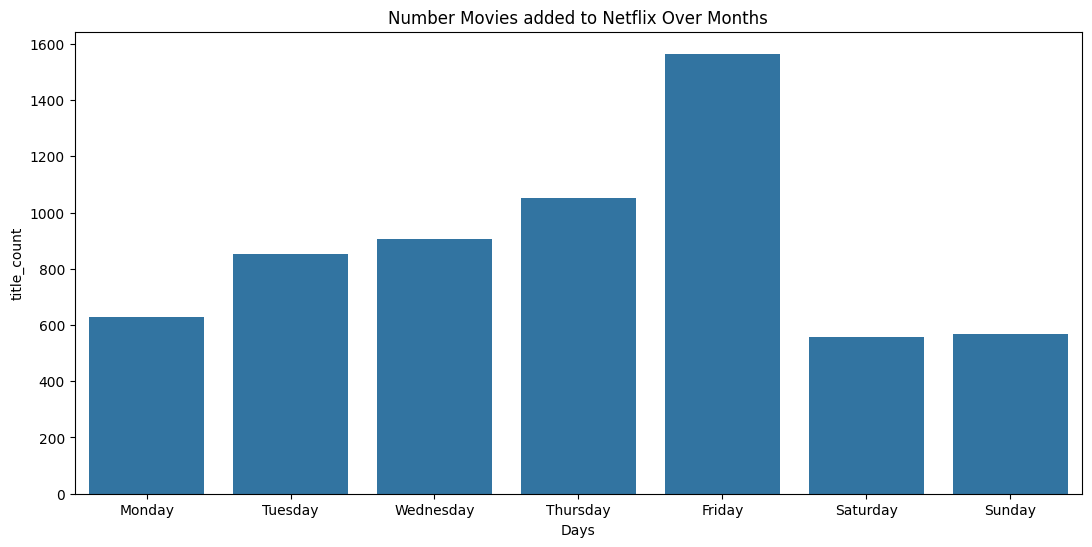

In [ ]:
plt.figure(figsize=(13, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sns.barplot(data = movie_day_distribution, x ='date_added', y = 'title_count',order=day_order)
plt.title('Number Movies added to Netflix Over Months')
plt.xlabel('Days')
plt.show()

In [ ]:
TV_Show_day_distribution.loc[TV_Show_day_distribution['title_count'] == TV_Show_day_distribution['title_count'].max()]

,date_added,type,title_count
0,Friday,TV Show,932


## **TV Shows are also mostly released on fridays. People spend time at home on weekends, increasing their likelihood of binge-watching TV shows.**

In [ ]:
TV_Show_day_distribution.sort_values(by='title_count',ascending=False,inplace=True)
TV_Show_day_distribution.head(5)

,date_added,type,title_count
0,Friday,TV Show,932
6,Wednesday,TV Show,382
5,Tuesday,TV Show,345
4,Thursday,TV Show,341
2,Saturday,TV Show,259


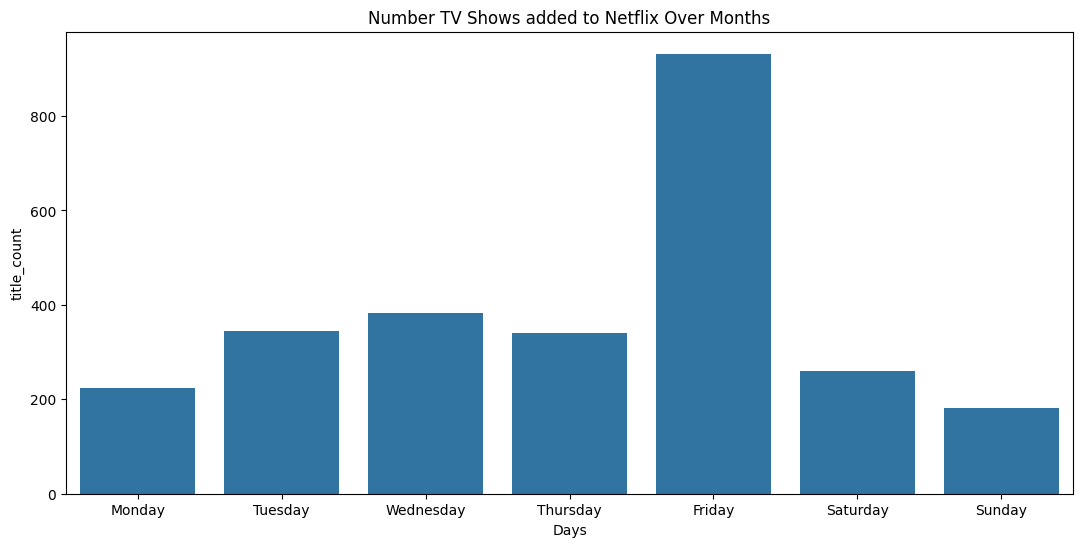

In [ ]:
plt.figure(figsize=(13, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sns.barplot(data = TV_Show_day_distribution, x ='date_added', y = 'title_count',order=day_order)
plt.title('Number TV Shows added to Netflix Over Months')
plt.xlabel('Days')
plt.show()

## Now, Let us look into the Duration details inorder to undersatnd more on the duration behaviors against different columns.

In [ ]:
clean_data['duration']=pd.to_numeric(clean_data['duration'])#converting the column to numeric

no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']

TV_Show_duration_distribution=no_of_TV_shows.groupby(['type','duration'])['title'].nunique().reset_index(name='title_count')
movie_duration_distribution=no_of_movies.groupby(['type','duration'])['title'].nunique().reset_index(name='title_count')
union_df=pd.concat([TV_Show_duration_distribution,movie_duration_distribution]).drop_duplicates().reset_index(drop=True)

TV_Show_duration_distribution.sort_values(by='duration',inplace=True)
movie_duration_distribution.sort_values(by='duration',inplace=True)

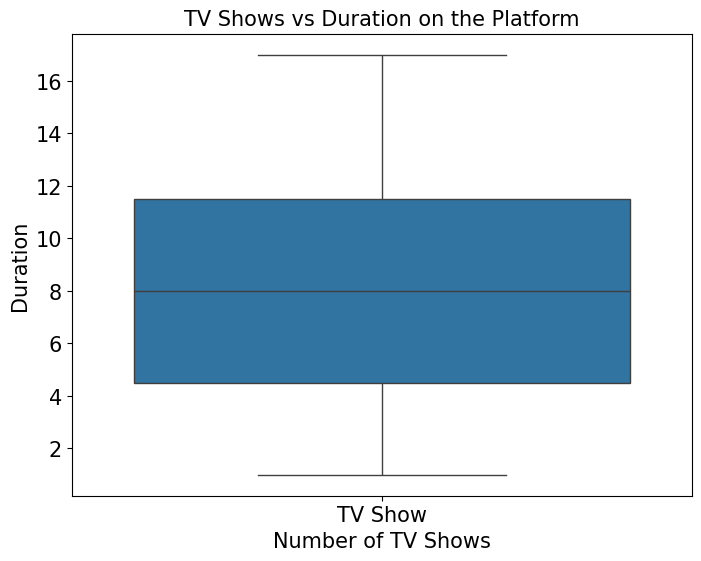

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = TV_Show_duration_distribution, x = 'type', y = 'duration')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of TV Shows', fontsize=15)
plt.ylabel('Duration', fontsize=15)
plt.title('TV Shows vs Duration on the Platform', fontsize=15)
plt.show()

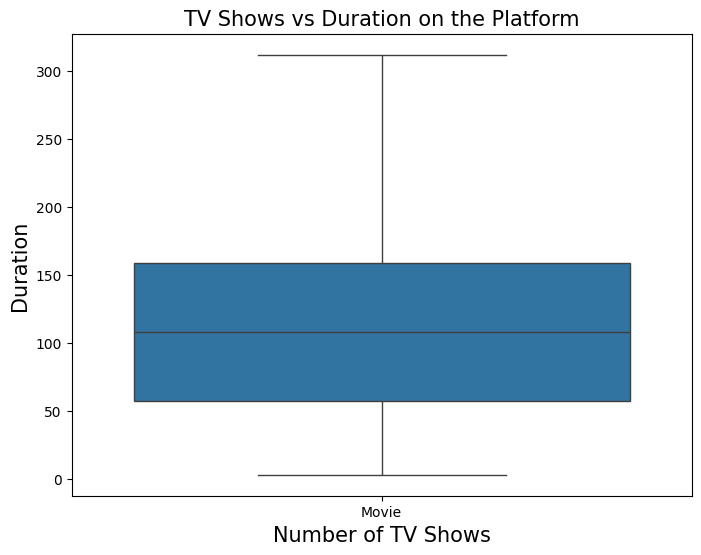

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data =movie_duration_distribution, x = 'type', y = 'duration')
plt.xlabel('Number of TV Shows', fontsize=15)
plt.ylabel('Duration', fontsize=15)
plt.title('TV Shows vs Duration on the Platform', fontsize=15)
plt.show()

# **The Boxplots give us the Idea on the median Duration of TV shows and movies respectively.**

# ***Now let us look in to the duration and it's changes with different genres of TV Shows and Movies in the platform.***

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']

TV_Show_duration_distribution_by_genre=no_of_TV_shows.groupby(['listed_in','duration'])['title'].nunique().reset_index(name='title_count')
movie_duration_distribution_by_genre=no_of_movies.groupby(['listed_in','duration'])['title'].nunique().reset_index(name='title_count')

In [ ]:
TV_Show_duration_distribution_by_genre

,listed_in,duration,title_count
0,anime series,1,114
1,anime series,2,41
2,anime series,3,10
3,anime series,4,3
4,anime series,5,3
...,...,...,...
176,tv thrillers,4,2
177,tv thrillers,5,2
178,tv thrillers,6,1
179,tv thrillers,7,1


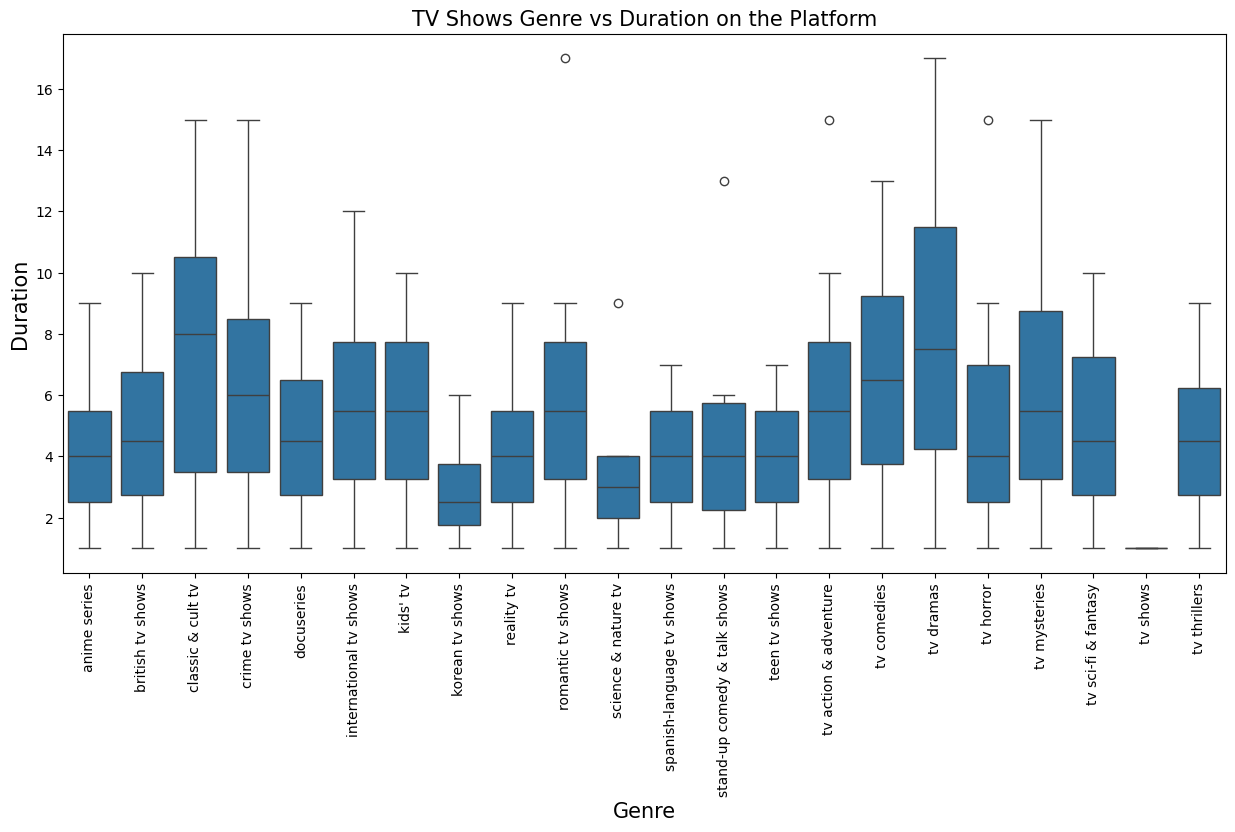

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = TV_Show_duration_distribution_by_genre, x = 'listed_in', y = 'duration')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Duration', fontsize=15)
plt.title('TV Shows Genre vs Duration on the Platform', fontsize=15)
plt.xticks(rotation=90)
plt.show()

### ***It can be observed that Classic and cult TV shows Tend to have more number of seasons in the 4 to 8 range where as TV dramas Hve more number of deasons in the 6-10 range and maxes out to even go beyond 16 seasons.***

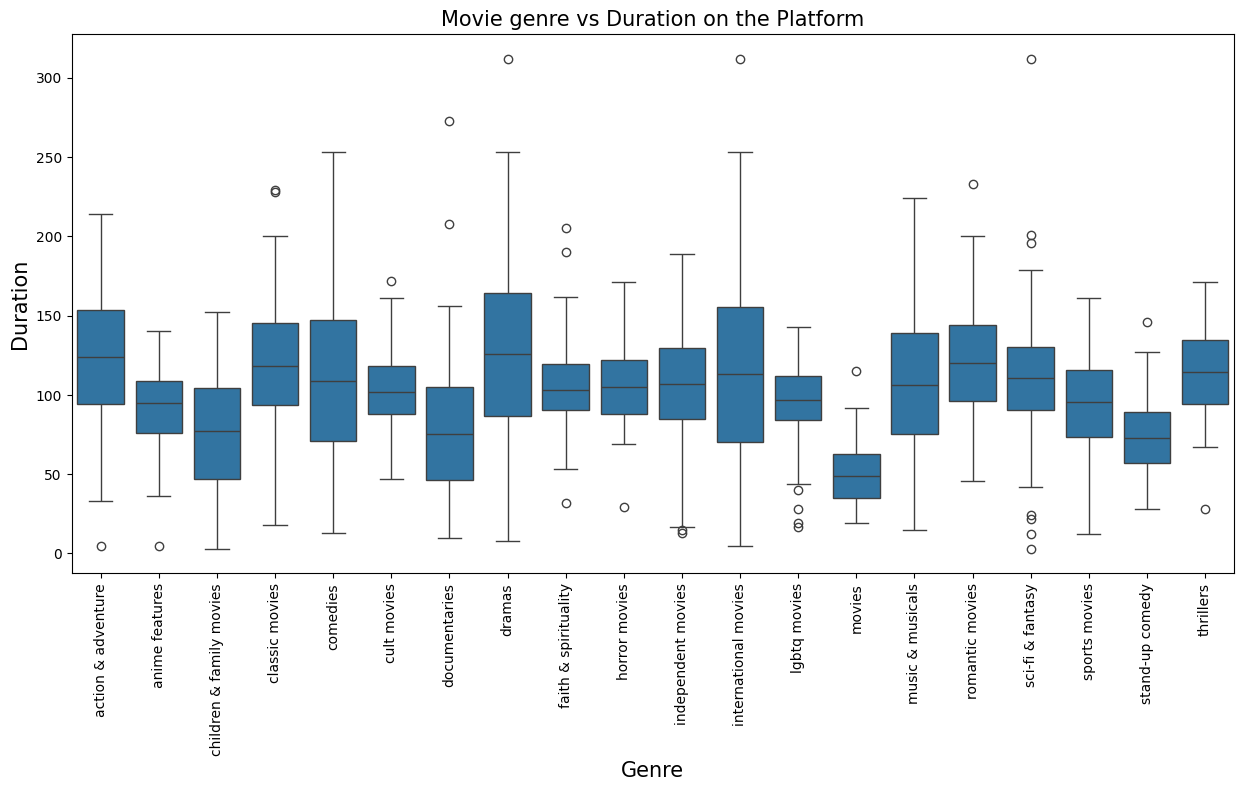

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = movie_duration_distribution_by_genre, x = 'listed_in', y = 'duration')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Duration', fontsize=15)
plt.title('Movie genre vs Duration on the Platform', fontsize=15)
plt.xticks(rotation=90)
plt.show()

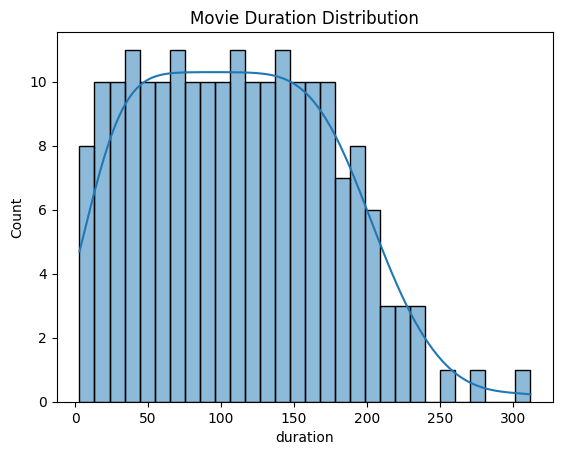

In [ ]:
no_of_movies=clean_data[clean_data['type']=='Movie']
movie_duration_distribution_hist=no_of_movies.groupby(['duration'])['title'].nunique().reset_index(name='title_count')
sns.histplot(data=movie_duration_distribution_hist, x='duration', bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.show()

# ***In the case of movies. It can be noted that the duration of all the genres in the platform shows a trend where they mostly prefer to range between 90 to 150 minutes.***

### *Studies on human attention span suggest that 90 to 150 minutes is the ideal duration for maintaining focus without causing fatigue. This helps in engaging the audiences with a more effective way of storry telling.*

### *This duration helps in a very optimal form of story telling where there is more room for detailed and thrilling screenplay for Niche subjects*

### *Movie durations range widely, with most being under 150 minutes. A few outliers extend up to 300 minutes.*

# *Now et us dive more into the duration stats. let us look into the top 10 consumers of the application and their duration statistics.*

In [ ]:
no_of_TV_shows=clean_data[clean_data['type']=='TV Show']
no_of_movies=clean_data[clean_data['type']=='Movie']

countries=['united states','india','united kingdom','france','canada','japan','spain','germany','nigeria','china','taiwan','mexico','south korea']
country_duration_TV_Shows=no_of_TV_shows[no_of_TV_shows['country'].isin(countries)].groupby(['country','duration'])['title'].nunique().reset_index(name='title_count')

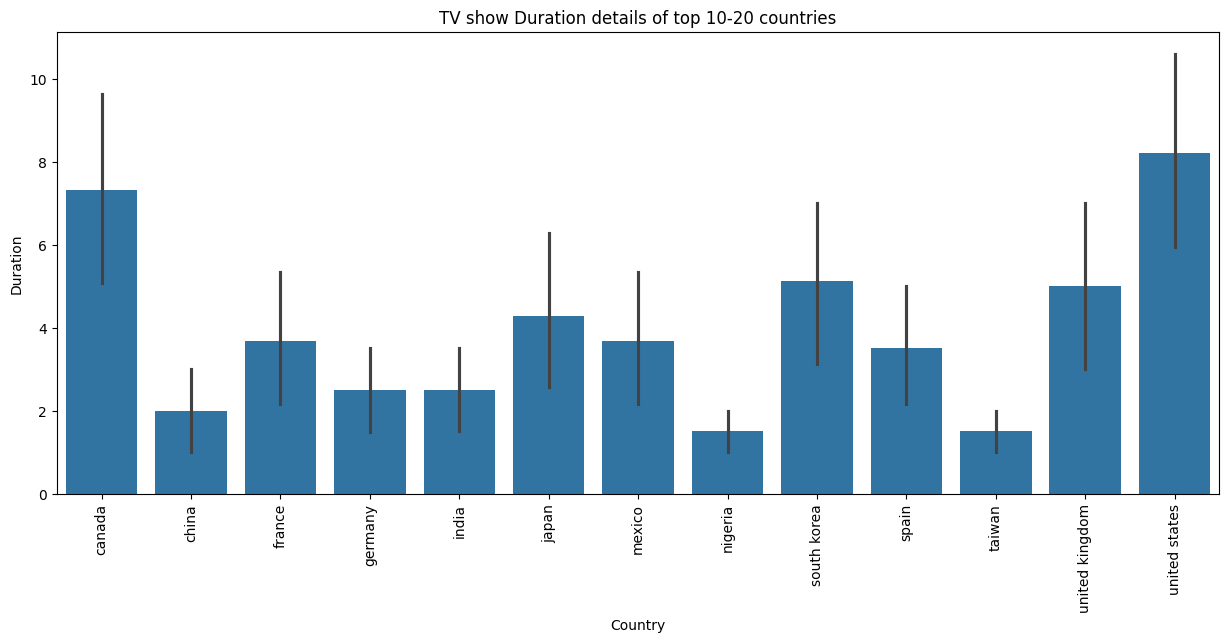

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=country_duration_TV_Shows, x='country', y='duration')
plt.title("TV show Duration details of top 10-20 countries")
plt.xlabel("Country")
plt.ylabel("Duration")
plt.xticks(rotation=90)
plt.show()

## TV shows from the united states Have that cult fan following, where once they are convinced about the plot people have no hessitance to commit themselves to the show.

In [ ]:
country_duration_movies=no_of_movies[no_of_movies['country'].isin(countries)].groupby(['country','duration'])['title'].nunique().reset_index(name='title_count')

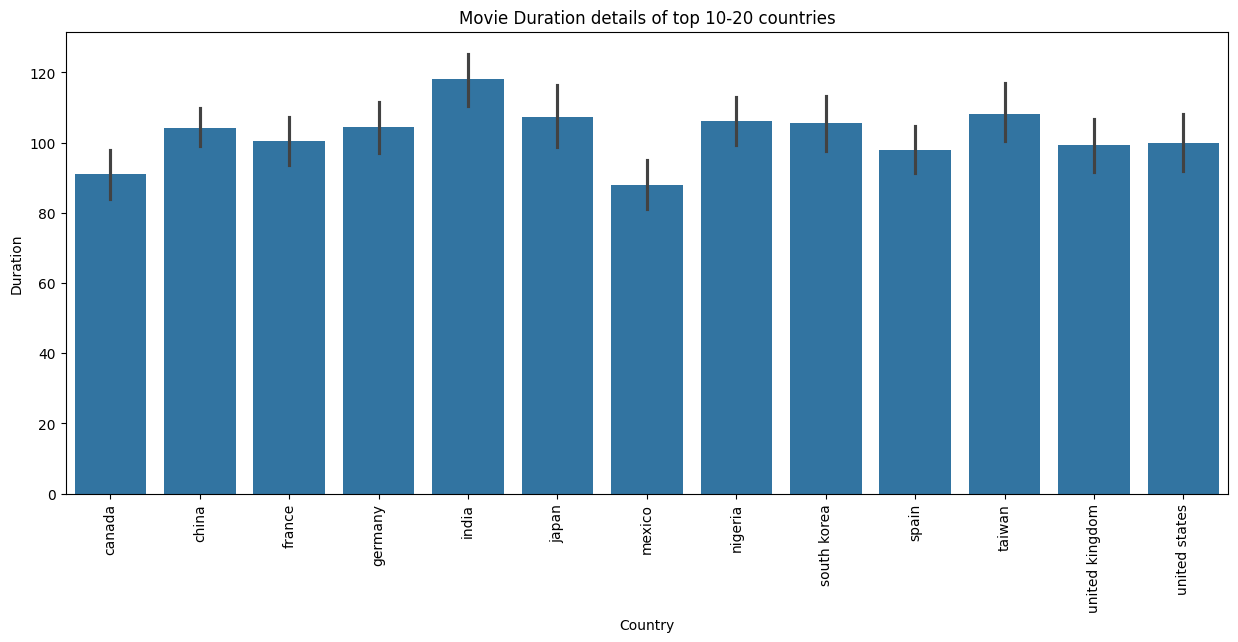

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=country_duration_movies, x='country', y='duration')
plt.title("Movie Duration details of top 10-20 countries")
plt.xlabel("Country")
plt.ylabel("Duration")
plt.xticks(rotation=90)
plt.show()

## Indian movies are od most duration. This might be due to the fact that unlike the Most countries, Indian movies has a theatrical system that involves intervals once the first half of the movie is done.

### During this time the viewers have time to consume snacks,use the washroom and get some fresh air. Thos  helps in reseting the attention span of the viewers and thus setting them up for a fresh watch in the second half

## **Now let us look more into the datasets and try to find any Noticable patterns between continuous vakues.**

In [ ]:
clean_data.nunique()

,0
show_id,8790
type,2
title,8790
director,5118
cast,39248
country,123
date_added,1713
release_year,74
rating,14
duration,210


<Figure size 1200x600 with 0 Axes>

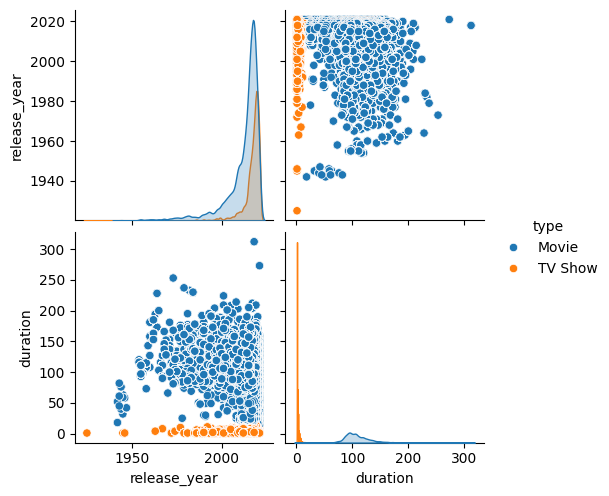

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=clean_data, hue='type')
plt.show()

The Pair plt shows the details



*   Netflix has focused more on modern content, with older content being relatively sparse.
*   For movies, there’s no strong correlation between release year and duration. Both older and newer movies follow a similar distribution of runtime.

*   Movies tend to dominate the dataset in both quantity and diversity of durations.





In [ ]:
num_df = clean_data.select_dtypes(include=[float,int])
num_df.corr()

,release_year,duration
release_year,1.000000,-0.305108
duration,-0.305108,1.000000


# The above is the correlation Matrix of the numeric values of the  dataset.

# **Actionable Recommendations for Netflix**

**Focus on Modern Content:**
Netflix should continue investing in new content as recent releases seem to dominate their catalog.

**TV Show Opportunities:**
Since TV shows are generally shorter in terms of duration (likely due to fewer seasons), Netflix could focus on creating more long-running series to increase engagement.

**Content from Older Eras:**
Consider acquiring or producing more content from earlier decades (pre-2000) to diversify the catalog and attract nostalgia-driven audiences.
Analyze Duration Further:

For movies, long-duration content might cater to niche audiences, while shorter movies might appeal to broader audiences.

For TV shows, investigate whether the shorter durations impact binge-watching behavior.

**Foccus on expansion:**
Netflix at the moment seems to be more content driven by only concentrating on a broad audience belonging to very specific countries. Netflix needs to foccus on attaining content on a regional level. This helps in attracting more audiences from different parts of the world where the Platform needs expand to.

**adjustment in the pricing:**
On addressing the pricing issue by providing offers on celebration and vaccation times, introducing plans for children,students and families, making the prices more affordable for developing and underdeveloped country can help.

A new partial subscription system where they will only have access to a very specific set of cataggories/genres/languages can be introduced in developing and underdeveloped countries.

A pay to watch scheme, where a consumer can pay and watch a certain movie or TV Show can also be introduced to increase the number of users in the underdeveloped countries.

Revenue in such cases may also be generated by running adds.